<a href="https://colab.research.google.com/github/Nickcys/hw4_M11221055/blob/main/%E3%80%8C%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92_%E8%B3%87%E6%96%99%E9%9B%861.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

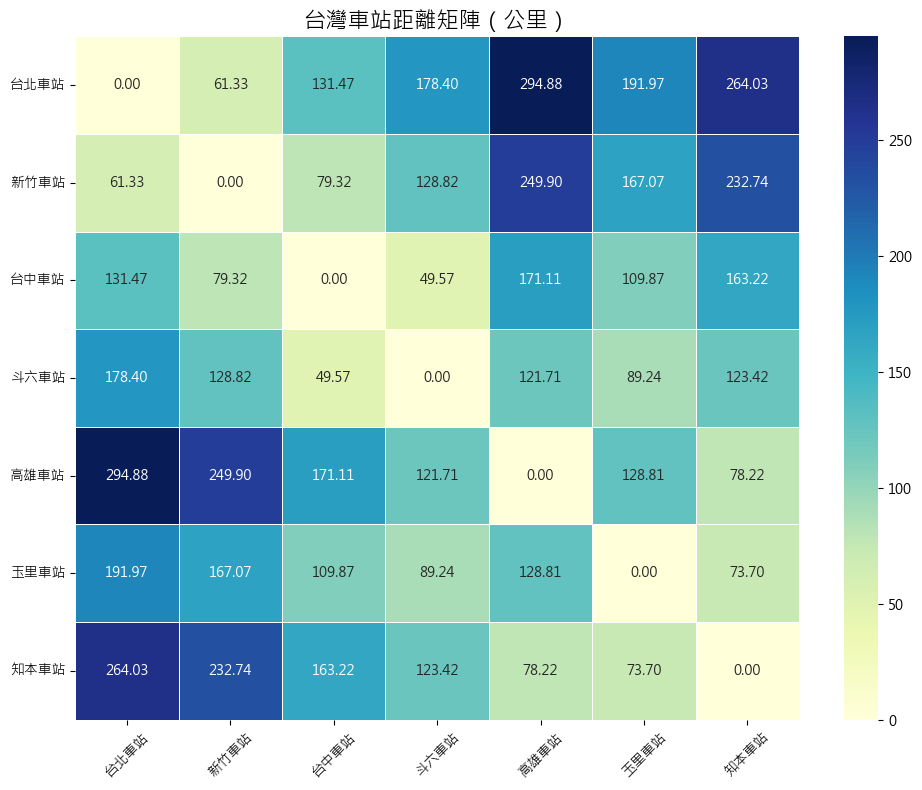

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft JhengHei'  # 中文
plt.rcParams['axes.unicode_minus'] = False          # 改用 ASCII 的 -
# Haversine 距離(用來計算地球上兩個座標點之間的「大圓距離」)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

# 讀取資料
df = pd.read_excel("資料集1 經緯度.xlsx")
names = df['車站'].tolist()
lat = df['緯度'].values
lon = df['經度'].values
n = len(names)

# 建立空的距離矩陣 D
D = np.zeros((n, n))
# 計算每一對車站間的球面距離（單位：公里）
for i in range(n):
    for j in range(n):
        D[i, j] = haversine(lat[i], lon[i], lat[j], lon[j])
# 將距離矩陣轉換為 DataFrame 以便顯示與輸出
distance_matrix_df = pd.DataFrame(D, index=names, columns=names)
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix_df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("台灣車站距離矩陣（公里）", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

MDS

In [ ]:
# 計算距離矩陣 D
D = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        D[i, j] = haversine(lat[i], lon[i], lat[j], lon[j])

# Step 1: D^2 (平方距離)
D_squared = D ** 2

# Step 2: double centering (把整個距離矩陣「中心化」後，得到一個類似內積矩陣的東西 B)
J = np.eye(n) - np.ones((n, n)) / n
B = -0.5 * J @ D_squared @ J

# Step 3: 特徵分解
eigvals, eigvecs = np.linalg.eigh(B)

# Step 4: 取最大的兩個特徵值（注意順序）
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Step 5: 計算 X = V * sqrt(Lambda)
L = np.diag(np.sqrt(eigvals[:2]))
V = eigvecs[:, :2]
X = V @ L


畫圖

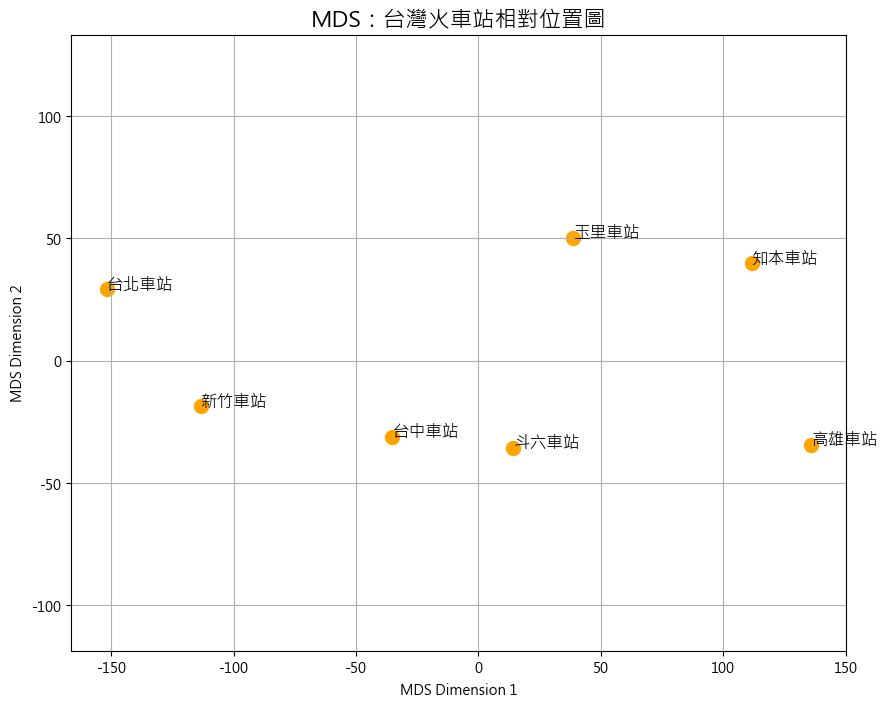

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=100, color='orange')
for i, name in enumerate(names):
    plt.text(X[i, 0]+0.05, X[i, 1]+0.05, name, fontsize=12)
plt.title("MDS：台灣火車站相對位置圖", fontsize=16)
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.axis('equal')
plt.grid(True)
plt.show()